In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [6]:
df_test.drop('id', axis = 1, inplace = True)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_train.drop('price_range', axis = 1).values
y = df_train['price_range'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [11]:
print('Accuracy training set: {:.4f}'.format(tree.score(X_train, y_train)))
print('Accuracy testing set: {:.4f}'.format(tree.score(X_test, y_test)))

Accuracy training set: 0.9943
Accuracy testing set: 0.8000


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forests = RandomForestClassifier(max_features = 10, n_estimators = 100)
forests.fit(X_train, y_train)

RandomForestClassifier(max_features=10)

In [14]:
print('Accuracy training set: {:.4f}'.format(forests.score(X_train, y_train)))
print('Accuracy testing set: {:.4f}'.format(forests.score(X_test, y_test)))

Accuracy training set: 1.0000
Accuracy testing set: 0.8867


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [17]:
X_train.shape

(1400, 20)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [30]:
early_stopping_monitor = EarlyStopping(patience=25)


model = Sequential()

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation = 'softmax'))

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test), callbacks=[early_stopping_monitor])

Epoch 1/200
44/44 [==============================] - 1s 8ms/step - loss: 1.4088 - accuracy: 0.2414 - val_loss: 1.3849 - val_accuracy: 0.2533
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3919 - accuracy: 0.2579 - val_loss: 1.3808 - val_accuracy: 0.2933
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3861 - accuracy: 0.2650 - val_loss: 1.3750 - val_accuracy: 0.3083
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3788 - accuracy: 0.2836 - val_loss: 1.3667 - val_accuracy: 0.3283
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3695 - accuracy: 0.3057 - val_loss: 1.3551 - val_accuracy: 0.3467
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3592 - accuracy: 0.3221 - val_loss: 1.3373 - val_accuracy: 0.3983
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 1.3411 - accuracy: 0.3293 - val_loss: 1.3070 - val_accuracy: 0.4200
Epoch 8/200
4

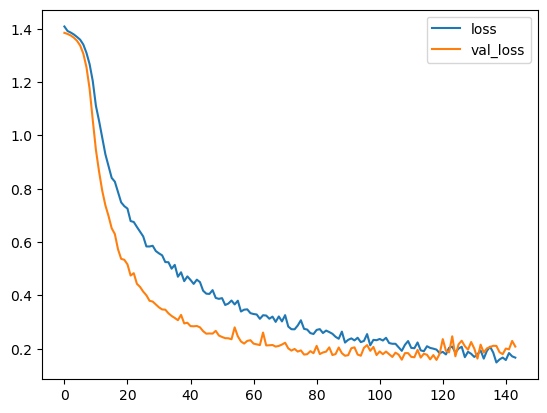

In [32]:
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()

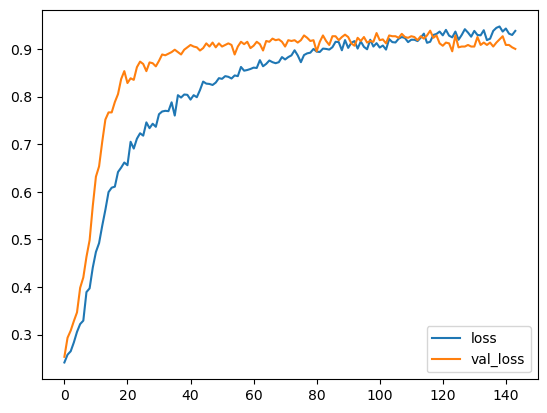

In [33]:
plt.plot(model.history.history['accuracy'], label = 'loss')
plt.plot(model.history.history['val_accuracy'], label = 'val_loss')
plt.legend()

In [34]:
predictions = model.predict(X_test)
classes_x=np.argmax(predictions,axis=-1)
classes_x

19/19 [==============================] - 0s 2ms/step


array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 1, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0, 1, 3, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 1, 2, 3, 0, 2, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [26]:
early_stopping_monitor = EarlyStopping(patience=25)


model = Sequential()

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation = 'softmax'))

model.compile(optimizer = RMSprop(learning_rate=0.0001,  weight_decay=1e-6), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
X_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.03607214, 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.36539746, 1.        , 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.3740815 , 1.        , 0.64      , ..., 1.        , 1.        ,
        0.        ]])

In [37]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [45]:
x_predict = df_train.drop('price_range', axis = 1).values
x_predict_scaled = scaler.transform(x_predict)

new_predict = model.predict(x_predict_scaled)
classes_x_predict = np.argmax(new_predict,axis=-1)

63/63 [==============================] - 0s 1ms/step


In [46]:
df_train['predicted_price_range'] = classes_x_predict

In [48]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,predicted_price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1


In [54]:
df_train[df_train['price_range'] != df_train['predicted_price_range']]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,predicted_price_range
32,1319,1,0.9,0,3,1,41,0.9,107,1,...,1152,2227,18,5,3,1,1,1,1,2
43,1656,0,1.0,0,5,1,34,0.1,166,3,...,1456,1629,15,12,14,1,1,0,1,2
49,596,0,2.1,1,9,0,64,0.8,111,8,...,1854,3238,16,13,10,0,0,0,3,2
127,1564,0,2.3,0,4,1,25,0.5,189,6,...,1965,1496,6,4,7,1,1,1,1,2
146,1101,0,1.8,0,0,0,31,0.2,148,2,...,1269,2196,12,6,19,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,1944,0,0.6,1,9,1,59,0.2,132,7,...,1079,769,19,13,3,1,0,1,0,1
1862,1043,0,2.7,0,3,0,29,0.2,83,8,...,893,1183,5,3,8,1,0,0,0,1
1912,695,0,1.2,0,1,1,41,0.4,169,8,...,1211,2282,5,2,17,1,1,0,1,2
1966,1583,0,1.2,1,0,0,14,0.2,148,2,...,1673,2498,13,6,8,0,0,1,2,3


In [56]:
x_predict = df_test.values
x_predict_scaled = scaler.transform(x_predict)

new_predict = model.predict(x_predict_scaled)
classes_x_predict = np.argmax(new_predict,axis=-1)

32/32 [==============================] - 0s 1ms/step


In [57]:
df_test['predicted_price_range'] = classes_x_predict

In [58]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
